# Compare 3D channel simulations 

3D channel is forced by winds and temperature restoring, and has a meridionally oriented ridge in the middle. 

## Load stats data and imports

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from xgcm import Grid

In [2]:
path_p05 = '/home/db194/scratch_db194/mom6/nov2025/MOM6_channel/working_ANN_exps/MOM6_channel_p05/OUTPUT/'
path_p25 = '/home/db194/scratch_db194/mom6/nov2025/MOM6_channel/working_ANN_exps/MOM6_channel_p25/'
path_p25_GM500  = '/home/db194/scratch_db194/mom6/nov2025/MOM6_channel/working_ANN_exps/MOM6_channel_p25_GM500/'
path_p25_ANN_FGNV  = '/home/db194/scratch_db194/mom6/nov2025/MOM6_channel/working_ANN_exps/MOM6_channel_p25_ANN_FGNV/'

In [3]:
os_p05 = xr.open_dataset(path_p05 + 'ocean.stats.0-1000.nc')
os_p25 = xr.open_dataset(path_p25 + 'ocean.stats.nc')
os_p25_GM500 = xr.open_dataset(path_p25_GM500 + 'ocean.stats.nc')
os_p25_ANN_FGNV = xr.open_dataset(path_p25_ANN_FGNV + 'ocean.stats.nc')

In [4]:
# Convert timedelta64[ns] Time coordinate to numeric days for each dataset
for var in [os_p05, os_p25, os_p25_GM500, os_p25_ANN_FGNV]:
    var.coords['Time'] = ('Time', var.Time.values / np.timedelta64(1, 'D'))

## Bulk stats

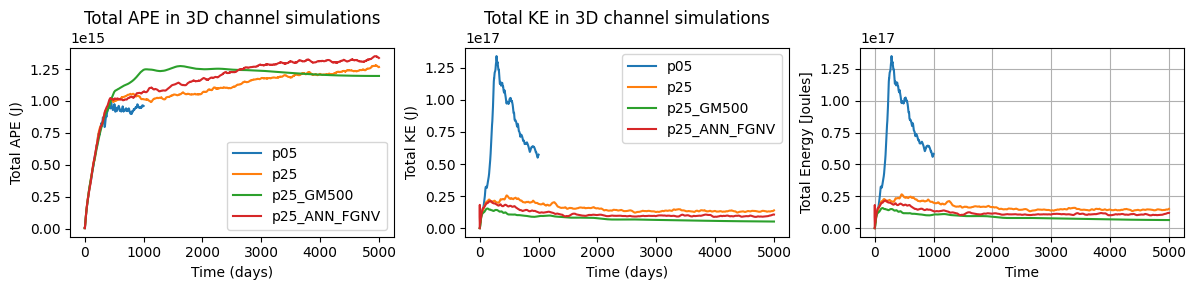

In [7]:
plt.figure(figsize=(12,3))

plt.subplot(131)
os_p05.APE.sum('Interface').plot(label='p05')
os_p25.APE.sum('Interface').plot(label='p25')
os_p25_GM500.APE.sum('Interface').plot(label='p25_GM500')
os_p25_ANN_FGNV.APE.sum('Interface').plot(label='p25_ANN_FGNV')
plt.legend()
plt.title('Total APE in 3D channel simulations')
plt.xlabel('Time (days)')
plt.ylabel('Total APE (J)')

plt.subplot(132)
os_p05.KE.sum('Layer').plot(label='p05')
os_p25.KE.sum('Layer').plot(label='p25')
os_p25_GM500.KE.sum('Layer').plot(label='p25_GM500')
os_p25_ANN_FGNV.KE.sum('Layer').plot(label='p25_ANN_FGNV')
plt.legend()
plt.title('Total KE in 3D channel simulations')
plt.xlabel('Time (days)')
plt.ylabel('Total KE (J)')  

plt.subplot(133)
os_p05.En.plot(label='p05')
os_p25.En.plot(label='p25')
os_p25_GM500.En.plot(label='p25_GM500')
os_p25_ANN_FGNV.En.plot(label='p25_ANN_FGNV')
plt.grid()
plt.tight_layout()

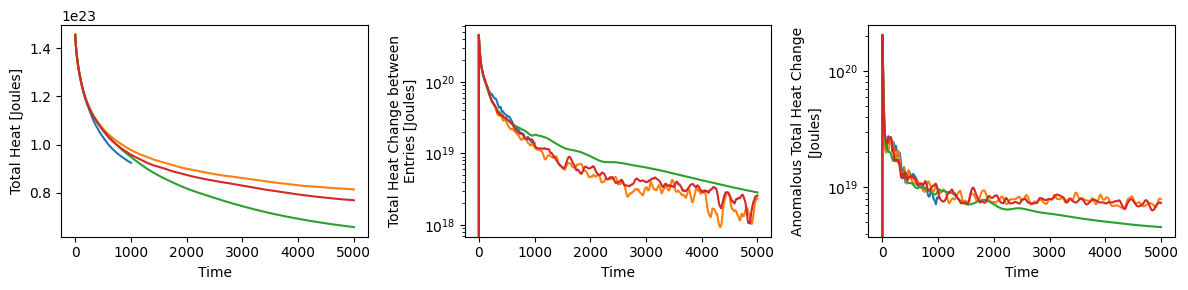

In [8]:
plt.figure(figsize=(12,3))

plt.subplot(131)
os_p05.Heat.plot(label='p05')
os_p25.Heat.plot(label='p25')
os_p25_GM500.Heat.plot(label='p25_GM500')
os_p25_ANN_FGNV.Heat.plot(label='p25_ANN_FGNV')

plt.subplot(132)
np.abs(os_p05.Heat_chg).plot(label='p05')
np.abs(os_p25.Heat_chg).plot(label='p25')
np.abs(os_p25_GM500.Heat_chg).plot(label='p25_GM500')
np.abs(os_p25_ANN_FGNV.Heat_chg).plot(label='p25_ANN_FGNV')
plt.yscale('log')

plt.subplot(133)
np.abs(os_p05.Heat_anom).plot(label='p05')
np.abs(os_p25.Heat_anom).plot(label='p25')
np.abs(os_p25_GM500.Heat_anom).plot(label='p25_GM500')
np.abs(os_p25_ANN_FGNV.Heat_anom).plot(label='p25_ANN_FGNV')
plt.yscale('log')

plt.tight_layout()

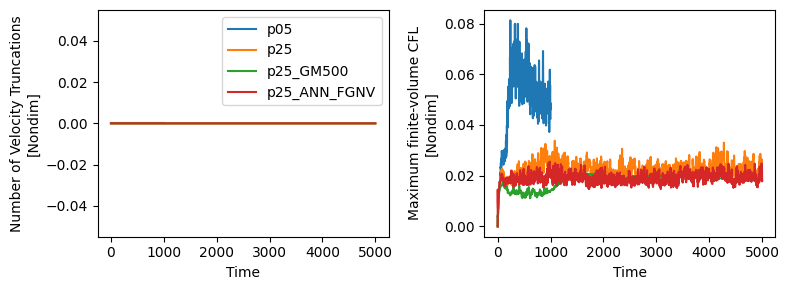

In [9]:
plt.figure(figsize=(8,3))

plt.subplot(121)
os_p05.Ntrunc.plot(label='p05')
os_p25.Ntrunc.plot(label='p25')
os_p25_GM500.Ntrunc.plot(label='p25_GM500')
os_p25_ANN_FGNV.Ntrunc.plot(label='p25_ANN_FGNV')
plt.legend()

plt.subplot(122)
os_p05.max_CFL_trans.plot(label='p05')
os_p25.max_CFL_trans.plot(label='p25')
os_p25_GM500.max_CFL_trans.plot(label='p25_GM500')
os_p25_ANN_FGNV.max_CFL_trans.plot(label='p25_ANN_FGNV')

plt.tight_layout()

## Load sim data

In [10]:
ds_p05 = xr.open_mfdataset(path_p05 + 'prog_00805.nc')
ds_p25 = xr.open_mfdataset(path_p25 + 'prog_04801.nc')
ds_p25_GM500 = xr.open_mfdataset(path_p25_GM500 + 'prog_04801.nc')
ds_p25_ANN_FGNV = xr.open_mfdataset(path_p25_ANN_FGNV + 'prog_04801.nc')

In [11]:
dsz_p05 = xr.open_mfdataset(path_p05 + 'prog_z_00805.nc')
dsz_p25 = xr.open_mfdataset(path_p25 + 'prog_z_04801.nc')
dsz_p25_GM500 = xr.open_mfdataset(path_p25_GM500 + 'prog_z_04801.nc')
dsz_p25_ANN_FGNV = xr.open_mfdataset(path_p25_ANN_FGNV + 'prog_z_04801.nc')

## Snapshots

In [12]:
def add_vorticity( ds ):
    grid = Grid(ds, coords={'X': {'center': 'xh', 'outer': 'xq'},
                            'Y': {'center': 'yh', 'outer': 'yq'},
                            'Z': {'inner': 'z_l', 'outer': 'z_i'} }, periodic=['X'])

    v_x = grid.diff(ds['v'], 'X') / grid.diff(ds['xh'], 'X')/110574/np.cos(np.deg2rad(ds['yq']))  # convert to meters
    u_y = grid.diff(ds['u'], 'Y', boundary='extend') / grid.diff(ds['yh'], 'Y')/110574  # convert to meters

    vort = v_x - u_y
    ds['vort'] = vort

    return ds

In [14]:
import warnings

warnings.filterwarnings('ignore')

In [15]:
dsz_p05 = add_vorticity( dsz_p05 )
dsz_p25 = add_vorticity( dsz_p25 )
dsz_p25_GM500 = add_vorticity( dsz_p25_GM500 )
dsz_p25_ANN_FGNV = add_vorticity( dsz_p25_ANN_FGNV )

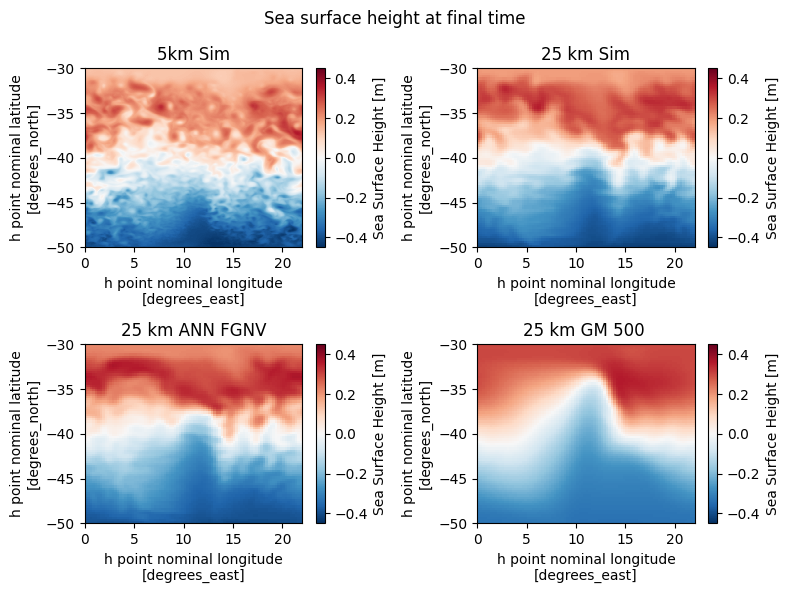

In [16]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
ds_p05.ssh.isel(Time=-1).plot(vmin=-0.45, vmax=0.45, cmap='RdBu_r')
plt.title('5km Sim')

plt.subplot(2,2,2)
ds_p25.ssh.isel(Time=-1).plot(vmin=-0.45, vmax=0.45, cmap='RdBu_r')
plt.title('25 km Sim')

plt.subplot(2,2,3)
ds_p25_ANN_FGNV.ssh.isel(Time=-1).plot(vmin=-0.45, vmax=0.45, cmap='RdBu_r')
plt.title('25 km ANN FGNV')

plt.subplot(2,2,4)
ds_p25_GM500.ssh.isel(Time=-1).plot(vmin=-0.45, vmax=0.45, cmap='RdBu_r')
plt.title('25 km GM 500 ')

plt.suptitle('Sea surface height at final time')
plt.tight_layout()


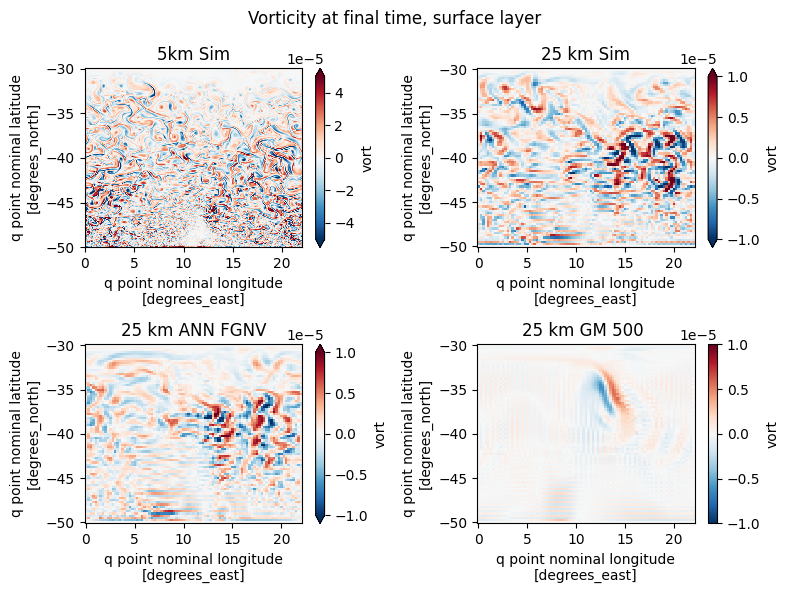

In [17]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
dsz_p05.vort.isel(Time=-1, z_l=0).plot(vmin=-5e-5, vmax=5e-5, cmap='RdBu_r')
plt.title('5km Sim')

plt.subplot(2,2,2)
dsz_p25.vort.isel(Time=-1, z_l=0).plot(vmin=-1e-5, vmax=1e-5, cmap='RdBu_r')
plt.title('25 km Sim')

plt.subplot(2,2,3)
dsz_p25_ANN_FGNV.vort.isel(Time=-1, z_l=0).plot(vmin=-1e-5, vmax=1e-5, cmap='RdBu_r')
plt.title('25 km ANN FGNV')

plt.subplot(2,2,4)
dsz_p25_GM500.vort.isel(Time=-1, z_l=0).plot(vmin=-1e-5, vmax=1e-5, cmap='RdBu_r')
plt.title('25 km GM 500 ')

plt.suptitle('Vorticity at final time, surface layer')
plt.tight_layout()


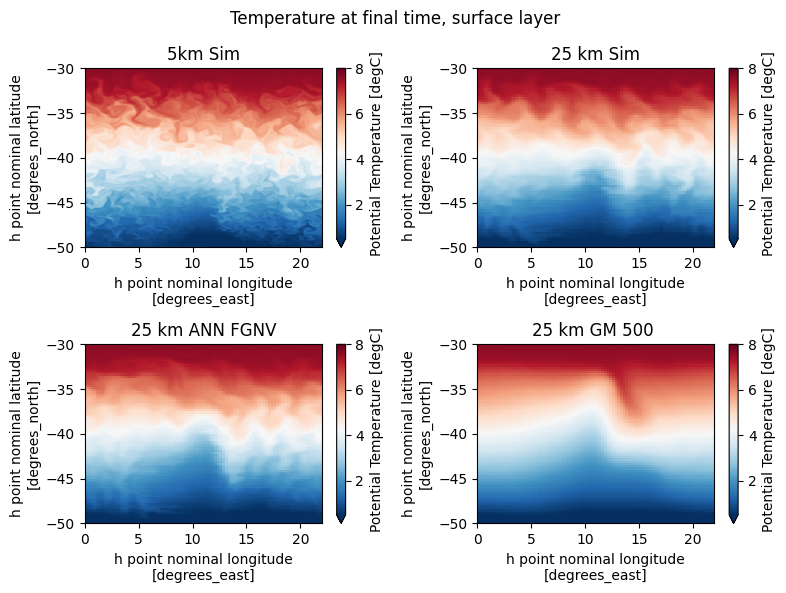

In [18]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
dsz_p05.temp.isel(Time=-1, z_l=0).plot(vmin=0.5, vmax=8, cmap='RdBu_r')
plt.title('5km Sim')

plt.subplot(2,2,2)
dsz_p25.temp.isel(Time=-1, z_l=0).plot(vmin=0.5, vmax=8, cmap='RdBu_r')
plt.title('25 km Sim')

plt.subplot(2,2,3)
dsz_p25_ANN_FGNV.temp.isel(Time=-1, z_l=0).plot(vmin=0.5, vmax=8, cmap='RdBu_r')
plt.title('25 km ANN FGNV')

plt.subplot(2,2,4)
dsz_p25_GM500.temp.isel(Time=-1, z_l=0).plot(vmin=0.5, vmax=8, cmap='RdBu_r')
plt.title('25 km GM 500 ')

plt.suptitle('Temperature at final time, surface layer')
plt.tight_layout()


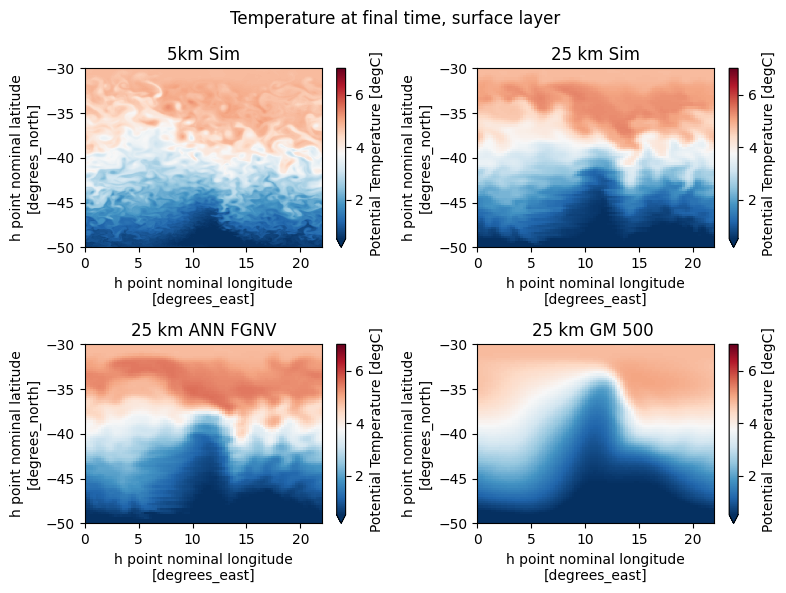

In [19]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
dsz_p05.temp.isel(Time=-1, z_l=4).plot(vmin=0.5, vmax=7, cmap='RdBu_r')
plt.title('5km Sim')

plt.subplot(2,2,2)
dsz_p25.temp.isel(Time=-1, z_l=4).plot(vmin=0.5, vmax=7, cmap='RdBu_r')
plt.title('25 km Sim')

plt.subplot(2,2,3)
dsz_p25_ANN_FGNV.temp.isel(Time=-1, z_l=4).plot(vmin=0.5, vmax=7, cmap='RdBu_r')
plt.title('25 km ANN FGNV')

plt.subplot(2,2,4)
dsz_p25_GM500.temp.isel(Time=-1, z_l=4).plot(vmin=0.5, vmax=7, cmap='RdBu_r')
plt.title('25 km GM 500 ')

plt.suptitle('Temperature at final time, surface layer')
plt.tight_layout()


## Mean states 

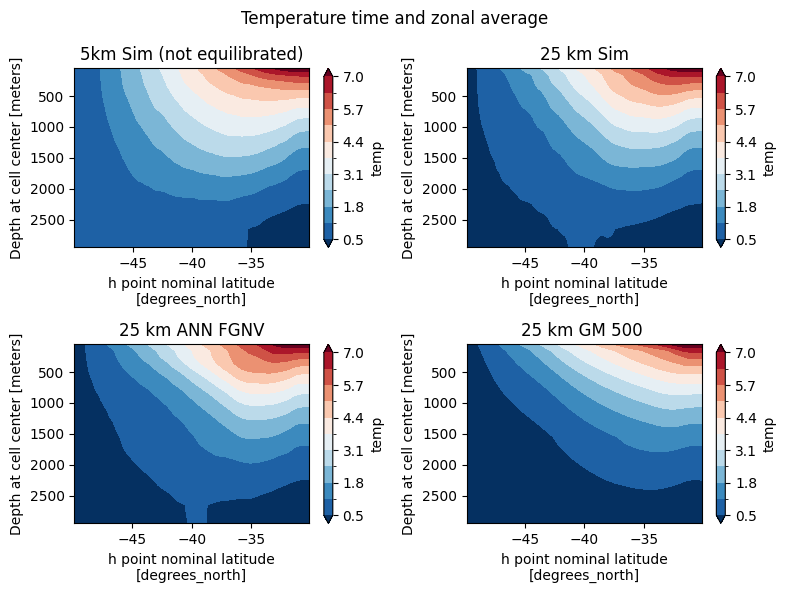

In [20]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
dsz_p05.temp.mean(['Time','xh']).plot.contourf(vmin=0.5, vmax=7, levels=11, cmap='RdBu_r')
plt.gca().invert_yaxis()
plt.title('5km Sim (not equilibrated)')

plt.subplot(2,2,2)
dsz_p25.temp.mean(['Time','xh']).plot.contourf(vmin=0.5, vmax=7, levels=11, cmap='RdBu_r')
plt.gca().invert_yaxis()
plt.title('25 km Sim')

plt.subplot(2,2,3)
dsz_p25_ANN_FGNV.temp.mean(['Time','xh']).plot.contourf(vmin=0.5, vmax=7, levels=11, cmap='RdBu_r')
plt.gca().invert_yaxis()
plt.title('25 km ANN FGNV')

plt.subplot(2,2,4)
dsz_p25_GM500.temp.mean(['Time','xh']).plot.contourf(vmin=0.5, vmax=7, levels=11, cmap='RdBu_r')
plt.gca().invert_yaxis()
plt.title('25 km GM 500 ')

plt.suptitle('Temperature time and zonal average')
plt.tight_layout()


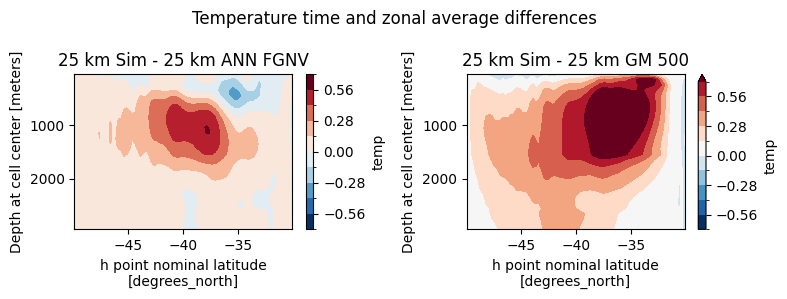

In [21]:
plt.figure(figsize=(8,3))

plt.subplot(121)
(dsz_p25.temp.mean(['Time','xh']) - dsz_p25_ANN_FGNV.temp.mean(['Time','xh'])).plot.contourf(vmin=-0.7, vmax=0.7, levels=11, cmap='RdBu_r')
plt.gca().invert_yaxis()
plt.title('25 km Sim - 25 km ANN FGNV')

plt.subplot(122)
(dsz_p25.temp.mean(['Time','xh']) - dsz_p25_GM500.temp.mean(['Time','xh'])).plot.contourf(vmin=-0.7, vmax=0.7, levels=11, cmap='RdBu_r')
plt.gca().invert_yaxis()
plt.title('25 km Sim - 25 km GM 500')

plt.suptitle('Temperature time and zonal average differences')
plt.tight_layout()

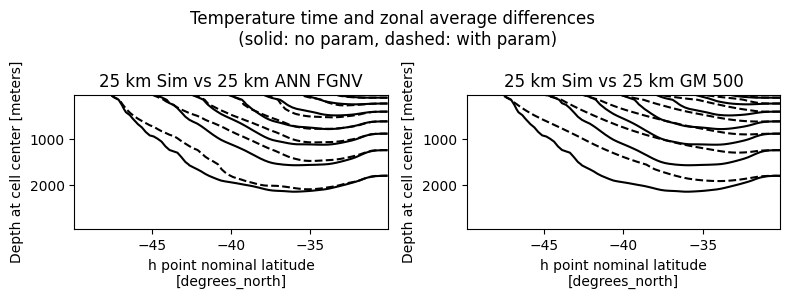

In [22]:
plt.figure(figsize=(8,3))

plt.subplot(121)
(dsz_p25.temp.mean(['Time','xh'])).plot.contour(vmin=0, vmax=8, levels=9, colors='k', label='25km no param')
(dsz_p25_ANN_FGNV.temp.mean(['Time','xh'])).plot.contour(vmin=0, vmax=8, levels=9, colors='k', linestyles='dashed', label='25km with param')
plt.gca().invert_yaxis()

plt.title('25 km Sim vs 25 km ANN FGNV')

plt.subplot(122)
(dsz_p25.temp.mean(['Time','xh'])).plot.contour(vmin=0, vmax=8, levels=9, colors='k')
(dsz_p25_GM500.temp.mean(['Time','xh'])).plot.contour(vmin=0, vmax=8, levels=9, colors='k', linestyles='dashed')
plt.gca().invert_yaxis()
plt.title('25 km Sim vs 25 km GM 500')

plt.suptitle('Temperature time and zonal average differences \n (solid: no param, dashed: with param)')
plt.tight_layout()

## Parameterized eddy driven cells

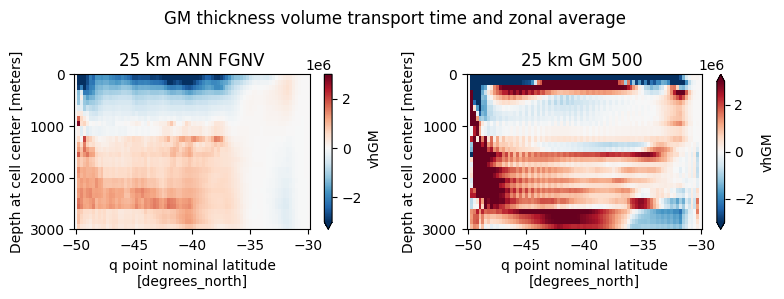

In [23]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
dsz_p25_ANN_FGNV.vhGM.mean(['Time','xh']).plot(vmin=-3e6)
plt.title('25 km ANN FGNV')
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
dsz_p25_GM500.vhGM.mean(['Time','xh']).plot(vmin=-3e6)
plt.title('25 km GM 500 ')
plt.gca().invert_yaxis()

plt.suptitle('GM thickness volume transport time and zonal average')

plt.tight_layout()

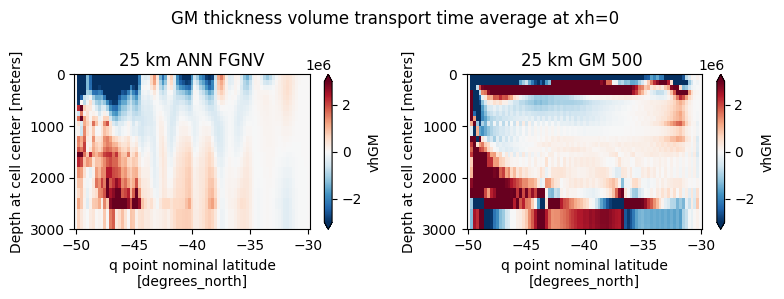

In [24]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
dsz_p25_ANN_FGNV.vhGM.mean(['Time']).isel(xh=0).plot(vmin=-3e6)
plt.title('25 km ANN FGNV')
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
dsz_p25_GM500.vhGM.mean(['Time']).isel(xh=0).plot(vmin=-3e6)
plt.title('25 km GM 500 ')
plt.gca().invert_yaxis()

plt.suptitle('GM thickness volume transport time average at xh=0')

plt.tight_layout()

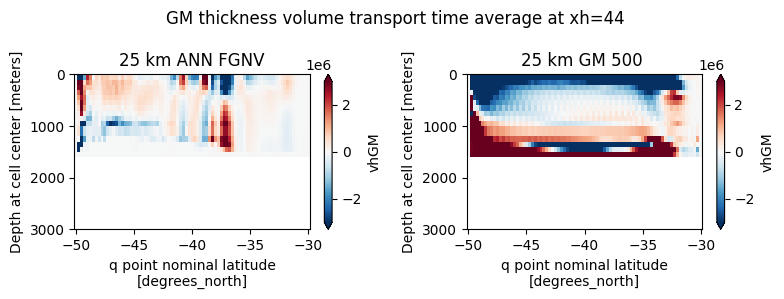

In [25]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
dsz_p25_ANN_FGNV.vhGM.mean(['Time']).isel(xh=44).plot(vmin=-3e6)
plt.title('25 km ANN FGNV')
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
dsz_p25_GM500.vhGM.mean(['Time']).isel(xh=44).plot(vmin=-3e6)
plt.title('25 km GM 500 ')
plt.gca().invert_yaxis()

plt.suptitle('GM thickness volume transport time average at xh=44')
plt.tight_layout()

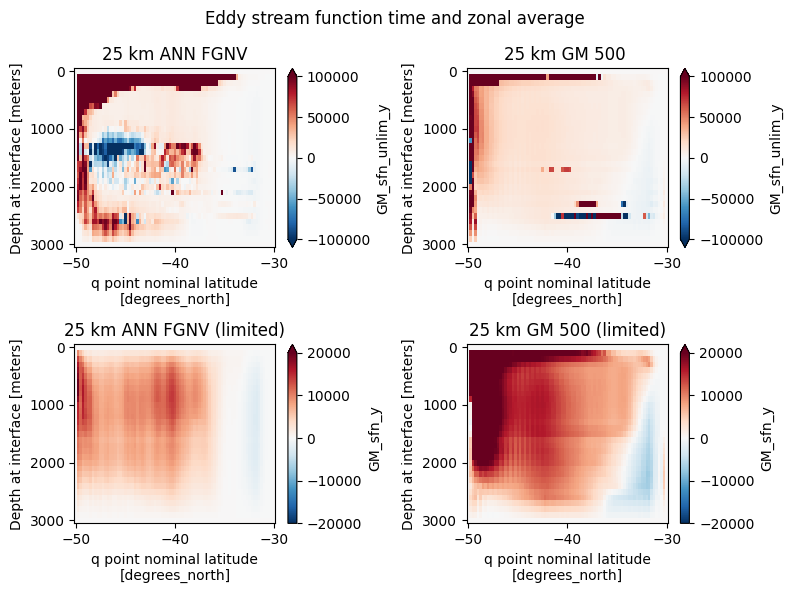

In [26]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
dsz_p25_ANN_FGNV.GM_sfn_unlim_y.mean(['Time','xh']).plot(vmin=-1e5)
plt.title('25 km ANN FGNV')
plt.gca().invert_yaxis()

plt.subplot(2,2,2)
dsz_p25_GM500.GM_sfn_unlim_y.mean(['Time','xh']).plot(vmin=-1e5)
plt.title('25 km GM 500 ')
plt.gca().invert_yaxis()

plt.subplot(2,2,3)
dsz_p25_ANN_FGNV.GM_sfn_y.mean(['Time','xh']).plot(vmin=-2e4)
plt.title('25 km ANN FGNV (limited)')
plt.gca().invert_yaxis()

plt.subplot(2,2,4)
dsz_p25_GM500.GM_sfn_y.mean(['Time','xh']).plot(vmin=-2e4)
plt.title('25 km GM 500 (limited)')
plt.gca().invert_yaxis()

plt.suptitle('Eddy stream function time and zonal average')


plt.tight_layout()

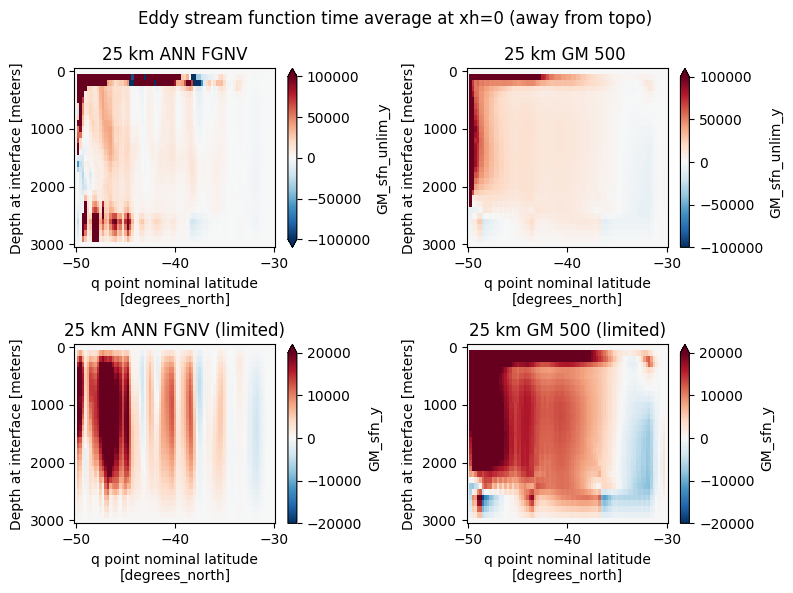

In [27]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
dsz_p25_ANN_FGNV.GM_sfn_unlim_y.mean(['Time']).isel(xh=0).plot(vmin=-1e5)
plt.title('25 km ANN FGNV')
plt.gca().invert_yaxis()

plt.subplot(2,2,2)
dsz_p25_GM500.GM_sfn_unlim_y.mean(['Time']).isel(xh=0).plot(vmin=-1e5)
plt.title('25 km GM 500 ')
plt.gca().invert_yaxis()

plt.subplot(2,2,3)
dsz_p25_ANN_FGNV.GM_sfn_y.mean(['Time']).isel(xh=0).plot(vmin=-2e4)
plt.title('25 km ANN FGNV (limited)')
plt.gca().invert_yaxis()

plt.subplot(2,2,4)
dsz_p25_GM500.GM_sfn_y.mean(['Time']).isel(xh=0).plot(vmin=-2e4)
plt.title('25 km GM 500 (limited)')
plt.gca().invert_yaxis()

plt.suptitle('Eddy stream function time average at xh=0 (away from topo)')


plt.tight_layout()

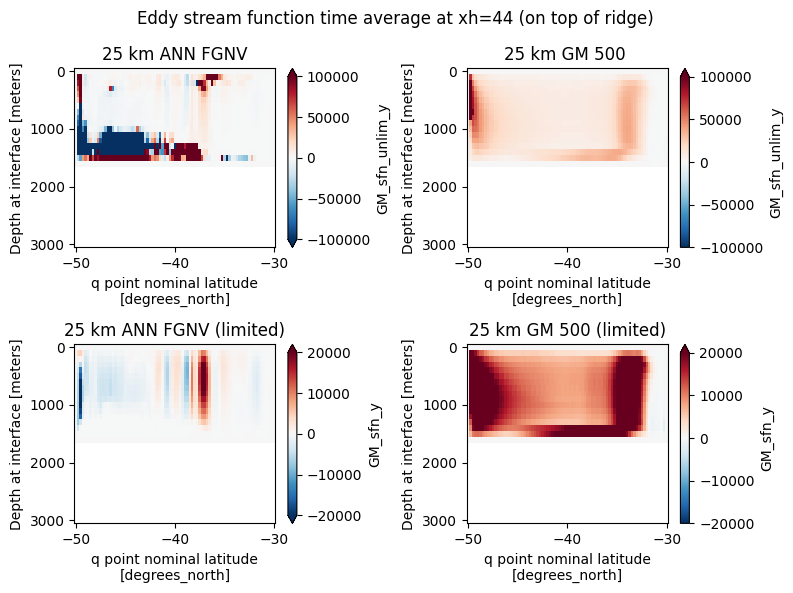

In [28]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
dsz_p25_ANN_FGNV.GM_sfn_unlim_y.mean(['Time']).isel(xh=44).plot(vmin=-1e5)
plt.title('25 km ANN FGNV')
plt.gca().invert_yaxis()

plt.subplot(2,2,2)
dsz_p25_GM500.GM_sfn_unlim_y.mean(['Time']).isel(xh=44).plot(vmin=-1e5)
plt.title('25 km GM 500 ')
plt.gca().invert_yaxis()

plt.subplot(2,2,3)
dsz_p25_ANN_FGNV.GM_sfn_y.mean(['Time']).isel(xh=44).plot(vmin=-2e4)
plt.title('25 km ANN FGNV (limited)')
plt.gca().invert_yaxis()

plt.subplot(2,2,4)
dsz_p25_GM500.GM_sfn_y.mean(['Time']).isel(xh=44).plot(vmin=-2e4)
plt.title('25 km GM 500 (limited)')
plt.gca().invert_yaxis()

plt.suptitle('Eddy stream function time average at xh=44 (on top of ridge)')

plt.tight_layout()

## Spectra

In [29]:
import xrft

In [30]:
ps_p05 = xrft.power_spectrum(dsz_p05.v, dim=['xh'])
ps_p25 = xrft.power_spectrum(dsz_p25.v, dim=['xh'])
ps_p25_GM500 = xrft.power_spectrum(dsz_p25_GM500.v, dim=['xh'])
ps_p25_ANN_FGNV = xrft.power_spectrum(dsz_p25_ANN_FGNV.v, dim=['xh'])

In [32]:
ps_p05_eta = xrft.power_spectrum(ds_p05.ssh, dim=['xh'])
ps_p25_eta = xrft.power_spectrum(ds_p25.ssh, dim=['xh'])
ps_p25_GM500_eta = xrft.power_spectrum(ds_p25_GM500.ssh, dim=['xh'])
ps_p25_ANN_FGNV_eta = xrft.power_spectrum(ds_p25_ANN_FGNV.ssh, dim=['xh'])

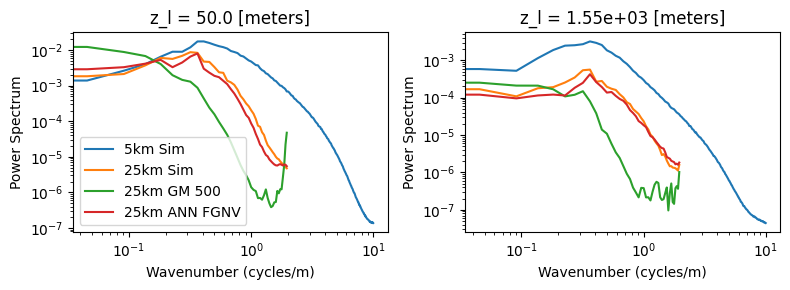

In [31]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
ps_p05.isel(z_l=0).sel(yq=slice(-45, -35)).mean(['Time','yq']).plot(label='5km Sim')
ps_p25.isel(z_l=0).sel(yq=slice(-45, -35)).mean(['Time','yq']).plot(label='25km Sim')
ps_p25_GM500.isel(z_l=0).sel(yq=slice(-45, -35)).mean(['Time','yq']).plot(label='25km GM 500')
ps_p25_ANN_FGNV.isel(z_l=0).sel(yq=slice(-45, -35)).mean(['Time','yq']).plot(label='25km ANN FGNV')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavenumber (cycles/m)')
plt.ylabel('Power Spectrum')
plt.legend()


plt.subplot(1,2,2)
ps_p05.isel(z_l=15).sel(yq=slice(-45, -35)).mean(['Time','yq']).plot(label='5km Sim')
ps_p25.isel(z_l=15).sel(yq=slice(-45, -35)).mean(['Time','yq']).plot(label='25km Sim')
ps_p25_GM500.isel(z_l=15).sel(yq=slice(-45, -35)).mean(['Time','yq']).plot(label='25km GM 500')
ps_p25_ANN_FGNV.isel(z_l=15).sel(yq=slice(-45, -35)).mean(['Time','yq']).plot(label='25km ANN FGNV')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavenumber (cycles/m)')
plt.ylabel('Power Spectrum')

plt.tight_layout()

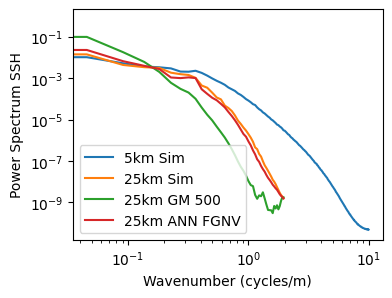

In [36]:
plt.figure(figsize=(4,3))

plt.subplot(1,1,1)
ps_p05_eta.sel(yh=slice(-45, -35)).mean(['Time','yh']).plot(label='5km Sim')
ps_p25_eta.sel(yh=slice(-45, -35)).mean(['Time','yh']).plot(label='25km Sim')
ps_p25_GM500_eta.sel(yh=slice(-45, -35)).mean(['Time','yh']).plot(label='25km GM 500')
ps_p25_ANN_FGNV_eta.sel(yh=slice(-45, -35)).mean(['Time','yh']).plot(label='25km ANN FGNV')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavenumber (cycles/m)')
plt.ylabel('Power Spectrum SSH')
plt.legend()